In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

rows, cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

# convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
def build_lenet(input_shape):
  # sequentail API
  model = tf.keras.Sequential()
  # convolutional layer 1
  model.add(tf.keras.layers.Conv2D(filters=6, 
                                   kernel_size=(5, 5), 
                                   strides=(1, 1),
                                   activation='tanh', 
                                   input_shape=input_shape))
  # average pooling layer 1
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                             strides=(2, 2)))
  # convolutional layer 2
  model.add(tf.keras.layers.Conv2D(filters=16, 
                                   kernel_size=(5, 5), 
                                   strides=(1, 1), 
                                   activation='tanh'))
  # average pooling layer 2 
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                             strides=(2, 2)))
  model.add(tf.keras.layers.Flatten())
  # fully connected
  model.add(tf.keras.layers.Dense(units=120, 
                                   activation='tanh'))
  model.add(tf.keras.layers.Flatten())
  # fully connected
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
  # output layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0), 
              metrics=['accuracy'])
  
  return model
 
lenet = build_lenet(input_shape)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
# number of epochs 
epochs = 50
# train the model
history = lenet.fit(x_train, y_train,
                           epochs=epochs, 
                           batch_size=128,
                           verbose=1)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4210 - acc: 0.8808
Epoch 2/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1681 - acc: 0.9500
Epoch 3/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1129 - acc: 0.9665
Epoch 4/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0865 - acc: 0.9746
Epoch 5/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0705 - acc: 0.9792
Epoch 6/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0606 - acc: 0.9819
Epoch 7/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0523 - acc: 0.9847
Epoch 8/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0468 - acc: 0.9862
Epoch 9/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0420 - acc: 0.9879
Epoch 10/50
60000/60000 [==============================] -

In [6]:
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ', acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0304 - acc: 0.9906
ACCURACY:  0.9906


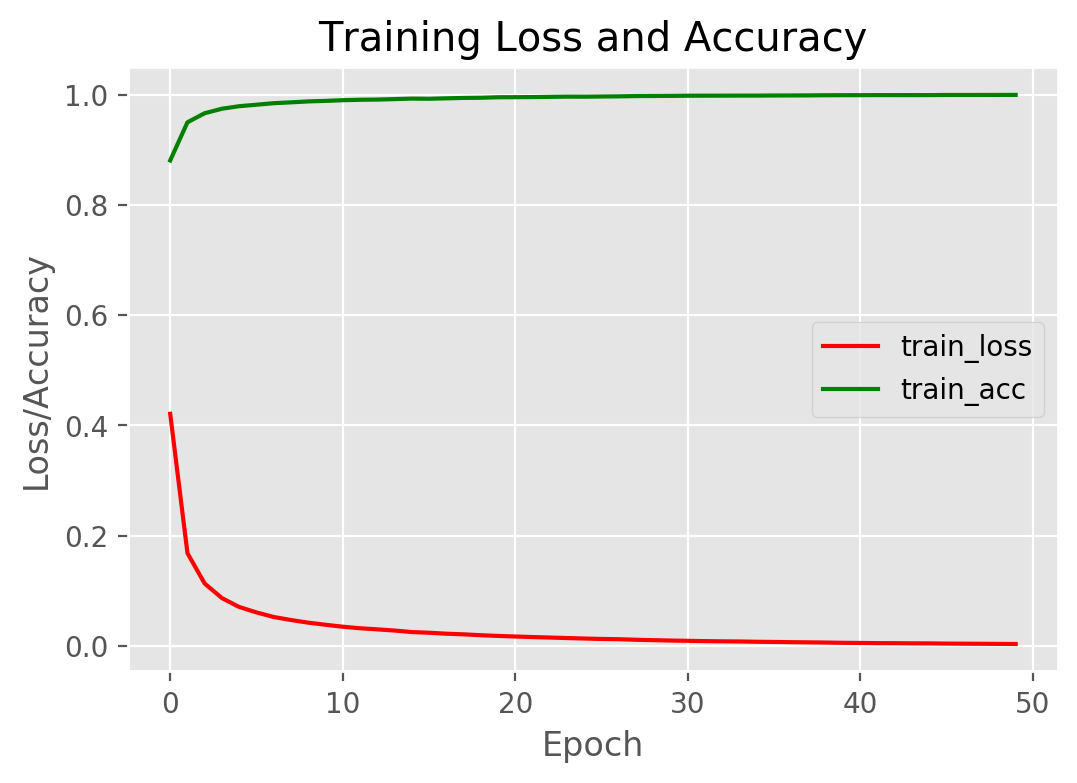

In [8]:
num_epochs = np.arange(0, 50)
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.plot(num_epochs, history.history['loss'], label='train_loss', c='red')
plt.plot(num_epochs, history.history['acc'], label='train_acc', c='green')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.savefig('plot.png')